In [1]:
# PASTE THIS TO THE FIRST CELL OF THE NOTEBOOK IN ORDER TO HAVE WORKING IMPORTS
import sys
import os
current_dir = os.getcwd()
parent_parent_dir = os.path.abspath(os.path.join(current_dir, '../..')) # tweak so that you get the root project folder

sys.path.append(parent_parent_dir)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
from src.features.get_x_y_tuples import * 
from sklearn.cluster import OPTICS
from src.models.clustering_optimization.optimize_optics import *
from matplotlib.gridspec import GridSpec
from src.visualization.get_cluster_colors import get_cluster_colors
from src.visualization.get_cluster_legend_handles import get_cluster_legend_handles
from sklearn.mixture._gaussian_mixture import GaussianMixture
from src.visualization.format_optimization_input_params_to_text import *
from src.visualization.format_clustering_parameter_dict_to_text import *

from src.models.clustering_optimization.optimize_gmm_parallelized_punish_non_edge_points import optimize_gmm_parallelized_punish_non_edge_points


In [3]:
# 1. load into dataframe
df_k729_2022_cuid = pd.read_csv('../../data/processed/k729_2022_cuid_lat_lon.csv')
df_k729_2022_cuid_grouped = pd.read_csv('../../data/processed/k729_2022_cuid_grouped_lat_lon.csv')
# 2. transform values to numbers
df_k729_2022_cuid_grouped['x'] = df_k729_2022_cuid_grouped['x'].apply(lambda x: ast.literal_eval(x))
df_k729_2022_cuid_grouped['y'] = df_k729_2022_cuid_grouped['y'].apply(lambda y: ast.literal_eval(y))

# 3. create tuple lists
list_k729_2022_x_y_tuples = get_x_y_tuple_list(df_k729_2022_cuid_grouped, ['x','y'])


In [4]:
from src.features.get_first_and_last_x_y_coordinates import *
from src.features.get_first_coordinates import get_first_x_y_coordinates
from src.features.get_last_coordinates import get_last_x_y_coordinates

first_last_x_coords, first_last_y_coords = get_first_and_last_x_y_coordinates(list_k729_2022_x_y_tuples)
X = np.array([first_last_x_coords, first_last_y_coords]).T


# GMM OPTIMIZATION PARALLEL: NOISE, NON EDGE PUNISHMENT, ADD METHOD

### optimization params

In [5]:
x_min, x_max, y_min, y_max = df_k729_2022_cuid['x'].min(), df_k729_2022_cuid['x'].max(), df_k729_2022_cuid['y'].min(), df_k729_2022_cuid['y'].max()
x_range, y_range = x_max - x_min, y_max - y_min
edge_factor = .2
x_non_edge_range, y_non_edge_range = [x_min + edge_factor*x_range, x_max - edge_factor*x_range], [y_min + edge_factor*y_range, y_max - edge_factor*y_range]

In [6]:
n_cluster_range = range(2, 11)
covariance_types = ['full', 'tied', 'diag', 'spherical']
n_init_range = range(1, 20)
init_params = ['kmeans', 'k-means++', 'random', 'random_from_data']
iter_range = range(1000, 1001)
random_states = range(1, 20)
punishment_factor_add = 10000

### optimize

In [7]:
gmm_optimization_results = optimize_gmm_parallelized_punish_non_edge_points(X, n_cluster_range, covariance_types, n_init_range, init_params, iter_range, random_states, x_non_edge_range, y_non_edge_range, punishment_factor_add, 'add')
print(gmm_optimization_results)

Punishing non-edge points with add factor 10000
Non-edge points range: x: [0.638936696472018, 23.468799746269298], y: [-23.02339317102644, -2.1342892308846935]
Only one cluster, skipping...
Only one cluster, skipping...
Only one cluster, skipping...
Only one cluster, skipping...
Only one cluster, skipping...
Only one cluster, skipping...
Only one cluster, skipping...
Iterations: 500
Current silhouette score: -9999.619535712349
Current calinski_harabasz_score: -9792.868221911114
Current davies_bouldin_score: 10000.860145355467
Current bic_score: 14636.12507960551
Current aic_score: 14602.851238226962
Iterations: 500
Current silhouette score: -9999.60710389891
Current calinski_harabasz_score: -9789.271629116982
Current davies_bouldin_score: 10000.96572506471
Current bic_score: 14093.748020920566
Current aic_score: 14060.474179542016
Iterations: 500
Current silhouette score: -9999.60710389891
Current calinski_harabasz_score: -9789.271629116982
Current davies_bouldin_score: 10000.965725064

### manual optimization results to not run it everytime

In [8]:
# gmm_optimization_results = TBD

### Cluster with the optimized params

In [9]:
# take the the optimized optics parameters for each score and cluster the start and end points
from numpy import cov


score_optimized_silhouette = gmm_optimization_results['best_silhouette']['silhouette_score']
n_cluster_optimized_silhouette = gmm_optimization_results['best_silhouette']['n_clusters']
covariance_type_optimized_silhouette = gmm_optimization_results['best_silhouette']['covariance_type']
n_init_optimized_silhouette = gmm_optimization_results['best_silhouette']['n_init']
max_iter_optimized_silhouette = gmm_optimization_results['best_silhouette']['max_iter']

score_optimized_calinski_harabasz = gmm_optimization_results['best_calinski_harabasz']['calinski_harabasz_score']
n_cluster_optimized_calinski_harabasz = gmm_optimization_results['best_calinski_harabasz']['n_clusters']
covariance_type_optimized_calinski_harabasz = gmm_optimization_results['best_calinski_harabasz']['covariance_type']
n_init_optimized_calinski_harabasz = gmm_optimization_results['best_calinski_harabasz']['n_init']
max_iter_optimized_calinski_harabasz = gmm_optimization_results['best_calinski_harabasz']['max_iter']


score_optimized_davies_bouldin = gmm_optimization_results['best_davies_bouldin']['davies_bouldin_score']
n_cluster_optimized_davies_bouldin = gmm_optimization_results['best_davies_bouldin']['n_clusters']
covariance_type_optimized_davies_bouldin = gmm_optimization_results['best_davies_bouldin']['covariance_type']
n_init_optimized_bic = gmm_optimization_results['best_davies_bouldin']['n_init']
max_iter_optimized_bic = gmm_optimization_results['best_davies_bouldin']['max_iter']

score_optimized_bic = gmm_optimization_results['best_bic']['bic_score']
n_cluster_optimized_bic = gmm_optimization_results['best_bic']['n_clusters']
covariance_type_optimized_bic = gmm_optimization_results['best_bic']['covariance_type']
n_init_optimized_bic = gmm_optimization_results['best_bic']['n_init']
max_iter_optimized_bic = gmm_optimization_results['best_bic']['max_iter']

score_optimized_aic = gmm_optimization_results['best_aic']['aic_score']
n_cluster_optimized_aic = gmm_optimization_results['best_aic']['n_clusters']
covariance_type_optimized_aic = gmm_optimization_results['best_aic']['covariance_type']
n_init_optimized_aic = gmm_optimization_results['best_aic']['n_init']
max_iter_optimized_aic = gmm_optimization_results['best_aic']['max_iter']


gmm_optimized_silhouette = GaussianMixture(n_components=n_cluster_optimized_silhouette, covariance_type=covariance_type_optimized_silhouette, n_init=n_init_optimized_silhouette, max_iter=max_iter_optimized_silhouette, random_state=42)
gmm_optimized_silhouette.fit(X)
labels_silhouette = gmm_optimized_silhouette.predict(X)
centers_silhouette = gmm_optimized_silhouette.means_

gmm_optimized_calinski_harabasz = GaussianMixture(n_components=n_cluster_optimized_calinski_harabasz, covariance_type=covariance_type_optimized_calinski_harabasz, n_init=n_init_optimized_calinski_harabasz, max_iter=max_iter_optimized_calinski_harabasz, random_state=42)
gmm_optimized_calinski_harabasz.fit(X)
labels_calinski_harabasz = gmm_optimized_calinski_harabasz.predict(X)
centers_calinski_harabasz = gmm_optimized_calinski_harabasz.means_

gmm_optimized_davies_bouldin = GaussianMixture(n_components=n_cluster_optimized_davies_bouldin, covariance_type=covariance_type_optimized_davies_bouldin, n_init=n_init_optimized_bic, max_iter=max_iter_optimized_bic, random_state=42)
gmm_optimized_davies_bouldin.fit(X)
labels_davies_bouldin = gmm_optimized_davies_bouldin.predict(X)
centers_davies_bouldin = gmm_optimized_davies_bouldin.means_

gmm_optimized_bic = GaussianMixture(n_components=n_cluster_optimized_bic, covariance_type=covariance_type_optimized_bic, n_init=n_init_optimized_bic, max_iter=max_iter_optimized_bic, random_state=42)
gmm_optimized_bic.fit(X)
labels_bic = gmm_optimized_bic.predict(X)
centers_bic = gmm_optimized_bic.means_

gmm_optimized_aic = GaussianMixture(n_components=n_cluster_optimized_aic, covariance_type=covariance_type_optimized_aic, n_init=n_init_optimized_aic, max_iter=max_iter_optimized_aic, random_state=42)
gmm_optimized_aic.fit(X)
labels_aic = gmm_optimized_aic.predict(X)
centers_aic = gmm_optimized_aic.means_


### create legend handles + colors

In [10]:
# plot the optimized optics cluster with the silhouette parameters
from src.visualization.get_cluster_colors import get_cluster_colors
from src.visualization.get_cluster_legend_handles import get_cluster_legend_handles


point_colors_start_end_silhouette_optimized, colors_start_end_silhouette_optimized = get_cluster_colors(labels_silhouette)
legend_handles_start_end_silhouette_optimized = get_cluster_legend_handles(colors_start_end_silhouette_optimized, labels_silhouette)

point_colors_start_end_calinski_harabasz_optimized, colors_start_end_calinski_harabasz_optimized = get_cluster_colors(labels_calinski_harabasz)
legend_handles_start_end_calinski_harabasz_optimized = get_cluster_legend_handles(colors_start_end_calinski_harabasz_optimized, labels_calinski_harabasz)

point_colors_start_end_davies_bouldin_optimized, colors_start_end_davies_bouldin_optimized = get_cluster_colors(labels_davies_bouldin)
legend_handles_start_end_davies_bouldin_optimized = get_cluster_legend_handles(colors_start_end_davies_bouldin_optimized, labels_davies_bouldin)

point_colors_start_end_bic_optimized, colors_start_end_bic_optimized = get_cluster_colors(labels_bic)
legend_handles_start_end_bic_optimized = get_cluster_legend_handles(colors_start_end_bic_optimized, labels_bic)

point_colors_start_end_aic_optimized, colors_start_end_aic_optimized = get_cluster_colors(labels_aic)
legend_handles_start_end_aic_optimized = get_cluster_legend_handles(colors_start_end_aic_optimized, labels_aic)

### create description texts

In [11]:
from src.visualization.format_clustering_parameter_dict_to_text import format_clustering_parameter_dict_to_text

optimization_parameters_description = format_optimization_input_params_to_text(n_cluster_range=n_cluster_range, covariance_types=covariance_types, n_init_range=n_init_range, init_params=init_params, iter_range=iter_range, random_states=random_states)
clustering_description = format_clustering_parameter_dict_to_text(gmm_optimization_results)

### plot

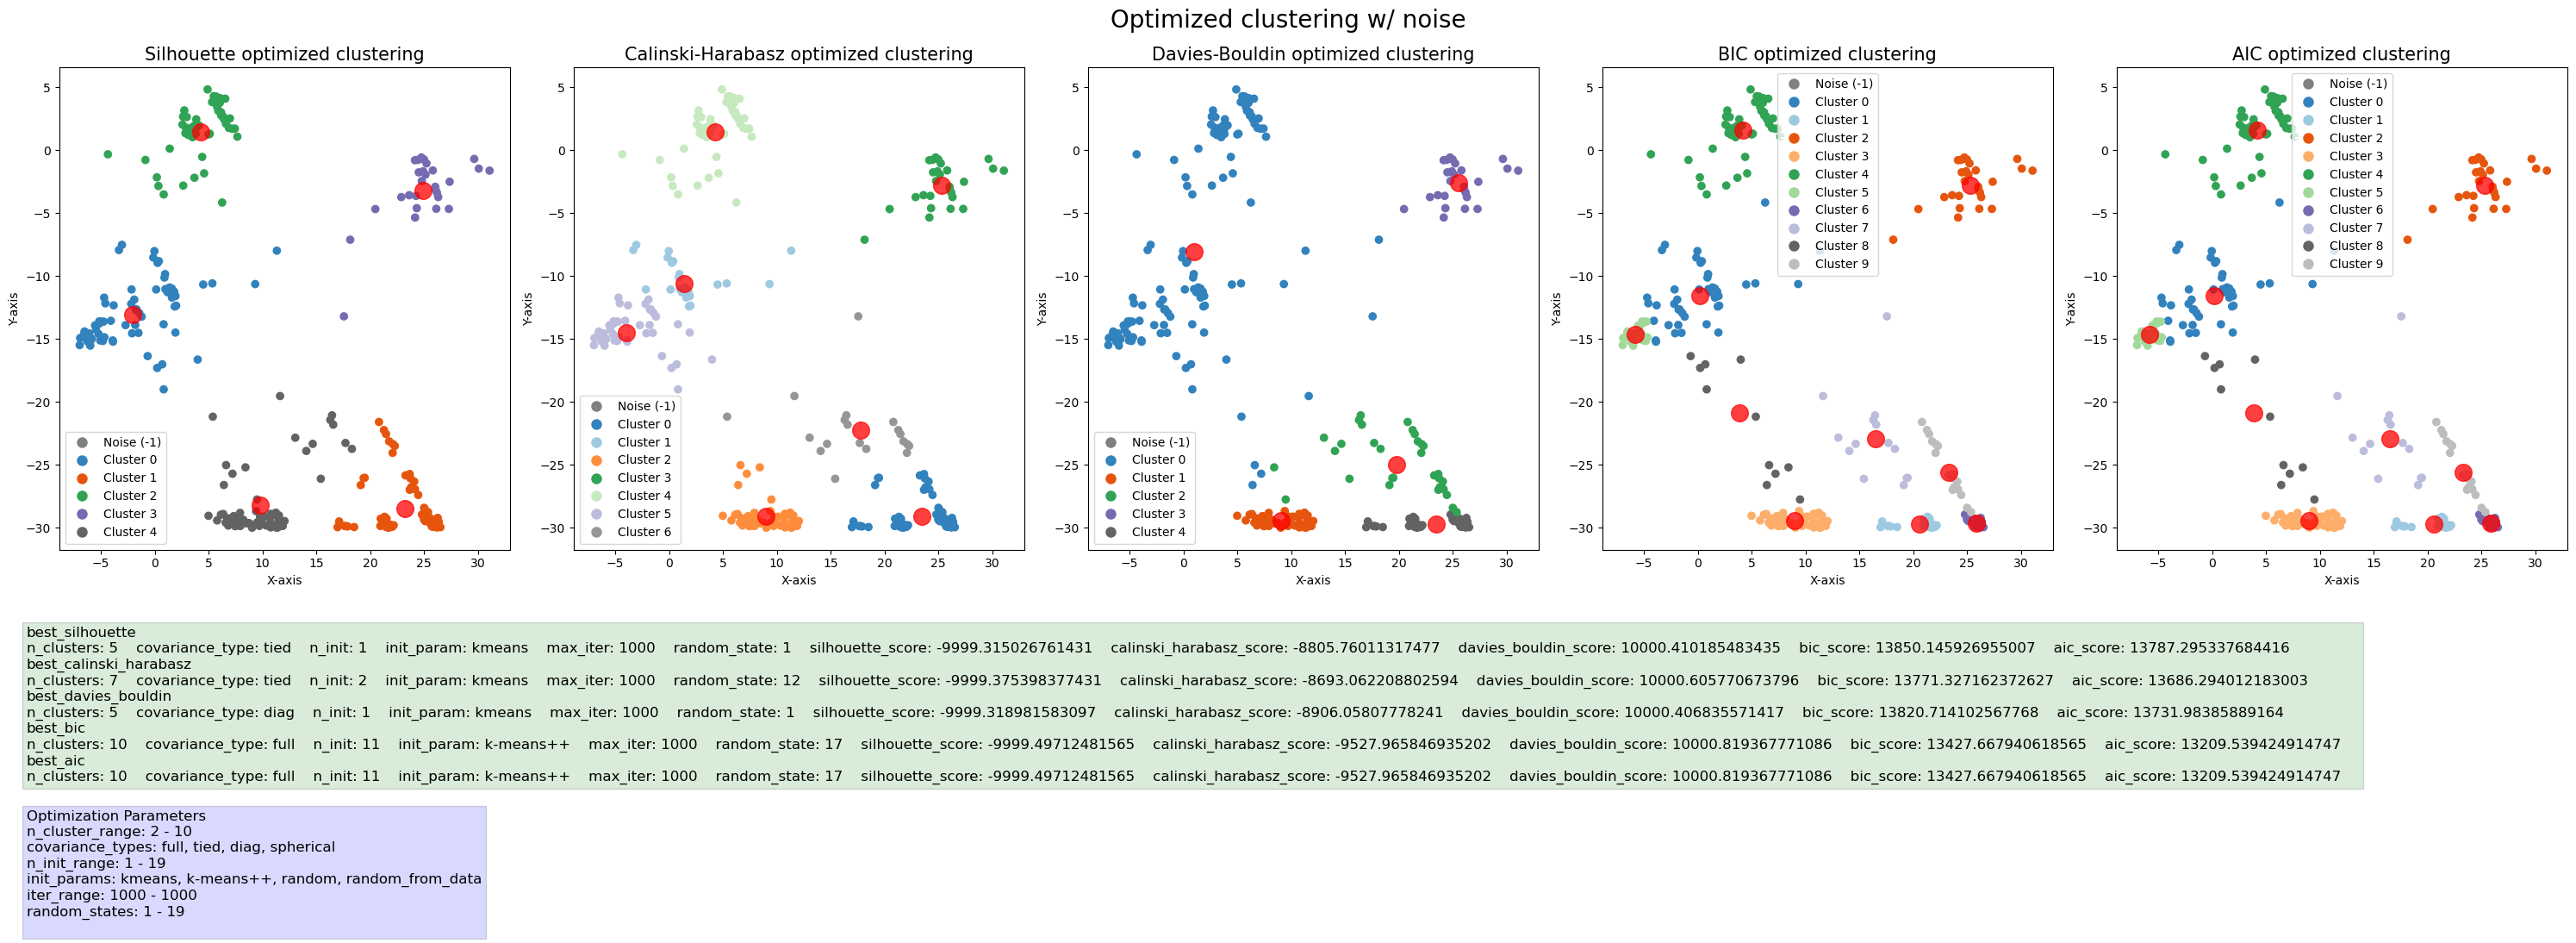

In [12]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(30, 7))
gs = GridSpec(1, 5, figure=fig)

ax1 = fig.add_subplot(gs[0, 0]) 
ax1.scatter(first_last_x_coords, first_last_y_coords, c=point_colors_start_end_silhouette_optimized)
ax1.scatter(centers_silhouette[:, 0], centers_silhouette[:, 1], c='red', s=200, alpha=0.75, label='Cluster Centers')
ax1.set_title(f'Silhouette optimized clustering', fontsize=15)
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.legend(handles=legend_handles_start_end_silhouette_optimized)

ax2 = fig.add_subplot(gs[0, 1])
ax2.scatter(first_last_x_coords, first_last_y_coords, c=point_colors_start_end_calinski_harabasz_optimized)
ax2.scatter(centers_calinski_harabasz[:, 0], centers_calinski_harabasz[:, 1], c='red', s=200, alpha=0.75, label='Cluster Centers')
ax2.set_title(f'Calinski-Harabasz optimized clustering', fontsize=15)
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.legend(handles=legend_handles_start_end_calinski_harabasz_optimized)

# Create the bottom right plot
ax3 = fig.add_subplot(gs[0, 2])  # Bottom right
ax3.scatter(first_last_x_coords, first_last_y_coords, c=point_colors_start_end_davies_bouldin_optimized)
ax3.scatter(centers_davies_bouldin[:, 0], centers_davies_bouldin[:, 1], c='red', s=200, alpha=0.75, label='Cluster Centers')
ax3.set_title(f'Davies-Bouldin optimized clustering', fontsize=15)
ax3.set_xlabel("X-axis")
ax3.set_ylabel("Y-axis")
ax3.legend(handles=legend_handles_start_end_davies_bouldin_optimized)

ax4 = fig.add_subplot(gs[0, 3])  # Bottom right
ax4.scatter(first_last_x_coords, first_last_y_coords, c=point_colors_start_end_bic_optimized)
ax4.scatter(centers_bic[:, 0], centers_bic[:, 1], c='red', s=200, alpha=0.75, label='Cluster Centers')
ax4.set_title(f'BIC optimized clustering', fontsize=15)
ax4.set_xlabel("X-axis")
ax4.set_ylabel("Y-axis")
ax4.legend(handles=legend_handles_start_end_bic_optimized)

ax5 = fig.add_subplot(gs[0, 4])  # Bottom right
ax5.scatter(first_last_x_coords, first_last_y_coords, c=point_colors_start_end_aic_optimized)
ax5.scatter(centers_aic[:, 0], centers_aic[:, 1], c='red', s=200, alpha=0.75, label='Cluster Centers')
ax5.set_title(f'AIC optimized clustering', fontsize=15)
ax5.set_xlabel("X-axis")
ax5.set_ylabel("Y-axis")
ax5.legend(handles=legend_handles_start_end_aic_optimized)

props_results = dict(boxstyle='square', facecolor='green', alpha=0.15)
fig.text(0.012,-0.3,f'{clustering_description}', fontsize=12, bbox=props_results)
props_optimization_parameters = dict(boxstyle='square', facecolor='blue', alpha=0.15)
fig.text(0.012,-0.55,f'Optimization Parameters\n{optimization_parameters_description}', fontsize=12, bbox=props_optimization_parameters)
plt.suptitle(f'Optimized clustering w/ noise', fontsize=20)


# Display the plots
plt.tight_layout()
plt.show()